## Exploratory Data Analysis



In [2]:
#reference : https://medium.com/bondata/%EC%B4%88%EC%8B%AC%EC%9E%90%EB%A5%BC-%EC%9C%84%ED%95%9C-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8B%9C%EA%B0%81%ED%99%94-eda-%EA%B0%80%EC%9D%B4%EB%93%9C%EB%9D%BC%EC%9D%B8-%EC%8B%A4%EC%8A%B5-62d11f93e17e
#import libraries
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#warnings
import warnings
warnings.filterwarnings('ignore')
#See the plot on the current browser
%matplotlib inline
import os
os.getcwd()

'C:\\Users\\main'

In [3]:
#Korean font styles are not supported
#need to address this in advance
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

In [68]:
df=pd.read_csv('manhattan.csv')
df=df[['rent','size_sqft','min_to_subway','bedrooms','has_gym','neighborhood']]
df.shape
df.describe()

,rent,size_sqft,min_to_subway,bedrooms,has_gym
count,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000
mean,5138.940379,939.727324,4.970896,1.351936,0.174908
std,3162.824760,477.949074,5.513589,0.967595,0.379942
min,1300.000000,250.000000,0.000000,0.000000,0.000000
25%,3150.000000,613.000000,2.000000,1.000000,0.000000
50%,4000.000000,800.000000,4.000000,1.000000,0.000000
75%,6000.000000,1141.000000,6.000000,2.000000,0.000000
max,20000.000000,4800.000000,43.000000,5.000000,1.000000


##### Missing values

In [69]:
#Randomly fill NA
df.loc[df.sample(frac=0.05).index,'rent']=pd.np.nan
df.isnull().sum().to_frame('na_count')
pd.DataFrame(data=df.isnull().sum()/len(df),columns=['na_ratio'])

,na_ratio
rent,0.050014
size_sqft,0.000000
min_to_subway,0.000000
bedrooms,0.000000
has_gym,0.000000
neighborhood,0.000000


In [24]:
df[df['rent'].isnull()]
#fill na with mean or check relationship with other variables
df['rent']=df['rent'].fillna(df['rent'].mean())
#the most frequent value
#df['rent']=df['rent'].fillna(df['rent'].value_counts().index[0]

#remove the rows with na
df_notna=df.dropna(axis=0) #column when axis=1

In [70]:
#Univariate Imputation 
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
imp.fit([[1,2],[np.nan,3],[7,6]])
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))
df_cat = pd.DataFrame([["a", "x"],
                    [np.nan, "y"],
                    ["a", np.nan],
                    ["b", "y"]], dtype="category")
imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df_cat))
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
imp.fit_transform(np.array(df['rent']).reshape(1,-1))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]
[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


array([[ 2550., 11500.,  4500., ...,  1699.,  3475.,  4500.]])

In [71]:
#Multivariate imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#sklearn iterative imputer
#Multiple Imputation with Chained Equation 
#but different-> only returns single imputation
imp=IterativeImputer(max_iter=10,random_state=0)
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])
X_test=[[np.nan,2],[6,np.nan],[np.nan,6]]
print(np.round(imp.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


In [75]:
imp=IterativeImputer(max_iter=10,random_state=0)
df_numerical=df.iloc[:,:-1]
df.iloc[:,:-1]=imp.fit_transform(df_numerical)
df['rent'].isnull().sum()

0

##### Data types and distribution

In [76]:
df.dtypes

rent             float64
size_sqft        float64
min_to_subway    float64
bedrooms         float64
has_gym          float64
neighborhood      object
dtype: object

In [77]:
df['size_sqft'].describe()
df['bedrooms'].describe()

count    3539.000000
mean        1.351936
std         0.967595
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: bedrooms, dtype: float64

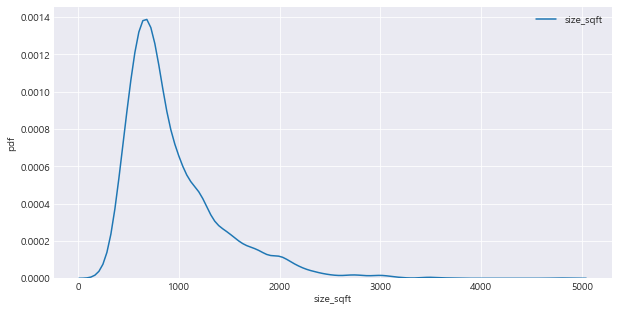

In [78]:
#Use kernel density plot -> make discrete variable continuous
plt.figure(figsize=(10,5))
#f, axes = plt.subplots(2, 3, figsize=(12, 6))
kde=sns.kdeplot(df['size_sqft'])
kde.set_xlabel('size_sqft')
kde.set_ylabel('pdf')
plt.show()

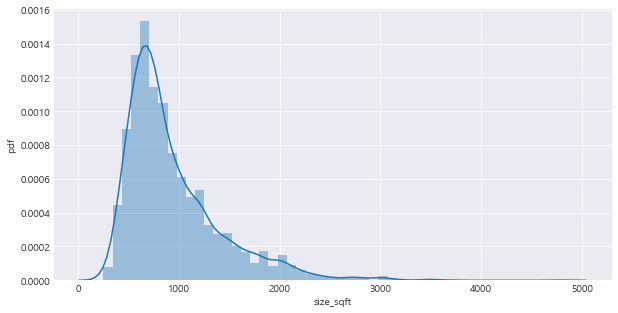

In [79]:
#distplot histogram
plt.figure(figsize=(10,5))
dist=sns.distplot(df['size_sqft'])
dist.set_xlabel('size_sqft')
dist.set_ylabel('pdf')
plt.show()

In [80]:
print('Skewness: %f' % df['size_sqft'].skew())
print('Kurtosis: %f' % df['size_sqft'].kurt())

Skewness: 1.750435
Kurtosis: 4.416880


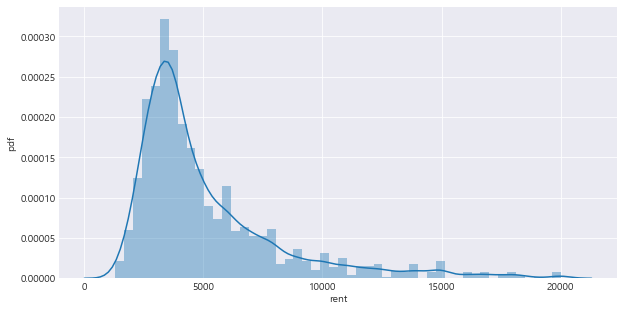

Skewness: 1.974088
Kurtosis: 4.258779


In [187]:
#distplot histogram
plt.figure(figsize=(10,5))
dist=sns.distplot(df['rent'])
dist.set_xlabel('rent')
dist.set_ylabel('pdf')
plt.show()
print('Skewness: %f' % df['rent'].skew())
print('Kurtosis: %f' % df['rent'].kurt())

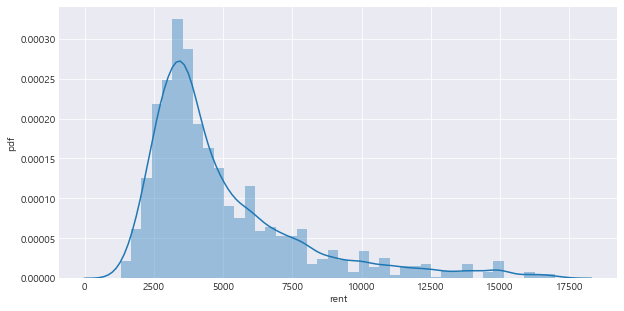

Skewness: 1.745953
Kurtosis: 3.065665


In [188]:
#Removing outliers
#set top 1% as outliers
cut_point=df['rent'].quantile(0.99)
cut_point
df_cut=df[df['rent']<cut_point]
#or by IQR range
Q1=df['rent'].quantile(0.25)
Q3=df['rent'].quantile(0.75)
IQR=Q3-Q1
df_cut_IQR=df[(df['rent']>=Q1-1.5*IQR) & (df['rent']<=Q3+1.5*IQR)]
#distplot histogram
plt.figure(figsize=(10,5))
dist=sns.distplot(df_cut['rent'])
dist.set_xlabel('rent')
dist.set_ylabel('pdf')
plt.show()
print('Skewness: %f' % df_cut['rent'].skew())
print('Kurtosis: %f' % df_cut['rent'].kurt())

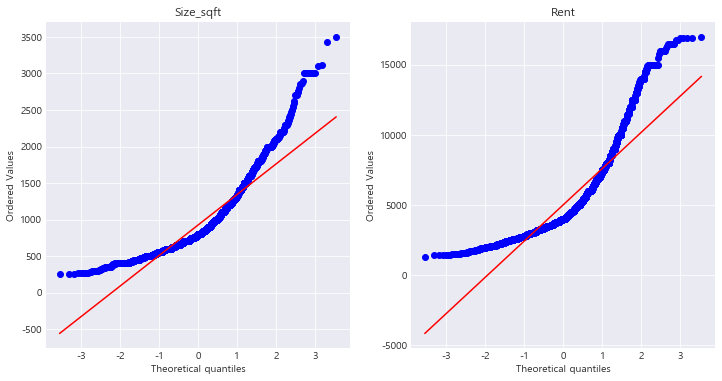

In [189]:
#Check if the distribution follows the Gaussian
#similar to QQ plot 
from scipy.stats import probplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
#axes[0].set_title('size_sqft')
ax1=probplot(df_cut['size_sqft'],plot=axes[0])
ax2=probplot(df_cut['rent'],plot=axes[1])
axes[0].set_title('Size_sqft')
axes[1].set_title('Rent')
plt.show()

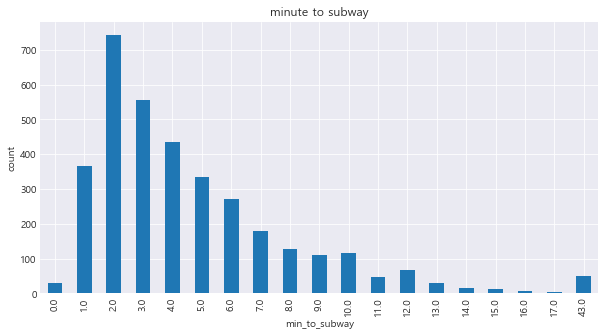

In [190]:
#discrete variable
plt.figure(figsize=(10,5))
df_cut['min_to_subway'].value_counts().sort_index(ascending=True).plot(kind='bar')
#df_cut['min_to_subway'].value_counts(ascending=True).plot(kind='bar')
plt.xlabel('min_to_subway')
plt.ylabel('count')
plt.title('minute to subway')
plt.show()

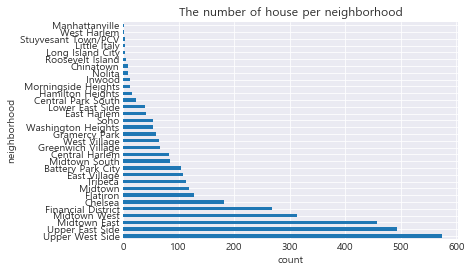

In [191]:
plt.figure()
df_cut['neighborhood'].value_counts().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('neighborhood')
plt.title('The number of house per neighborhood')
plt.show()

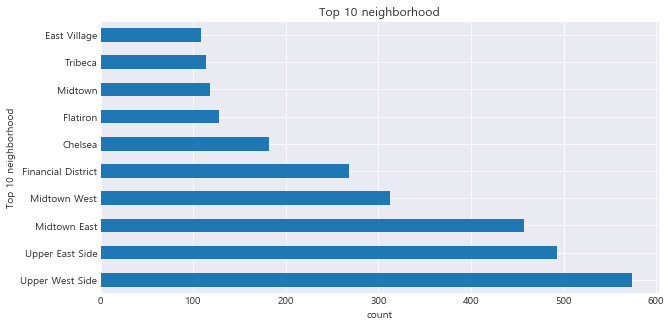

In [192]:
df_cut['neighborhood'].value_counts().nlargest(10)
plt.figure(figsize=(10,5))
df_cut['neighborhood'].value_counts().nlargest(10).plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Top 10 neighborhood')
plt.title('Top 10 neighborhood')
plt.show()

##### Relationship between variables

###### Conti-conti -> scatter, correlation
###### cate-cate ->cumulative bar chart, chi square
###### cate-conti -> cumul_bar or histogram, T/Z-test, ANOVA

<Figure size 720x360 with 0 Axes>

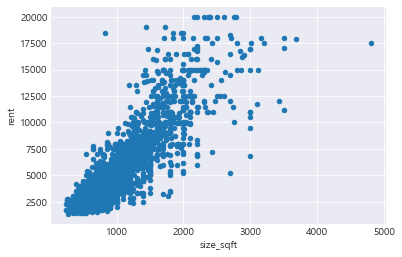

In [193]:
plt.figure(figsize=(10,5))
df.plot.scatter(x='size_sqft',y='rent')
plt.show()

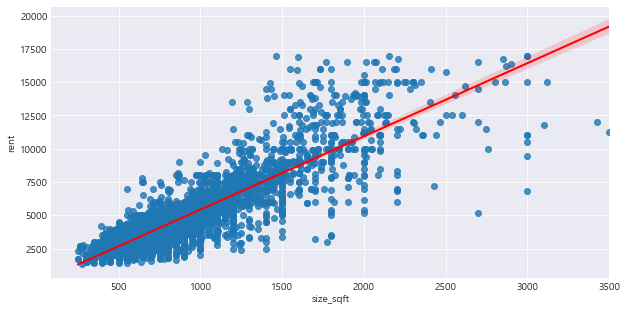

In [194]:
#Scatterplot with regression fit
plt.figure(figsize=(10,5))
reg=sns.regplot(x=df_cut['size_sqft'],y=df_cut['rent'],line_kws={'color':'red','lw':2})
plt.show()

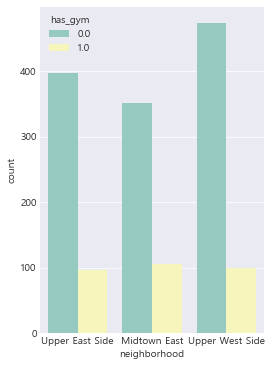

In [195]:
#categorical
df_top3=df_cut[df_cut['neighborhood'].isin(df_cut['neighborhood'].value_counts()[:3].index.tolist())]
plt.figure(figsize=(4,6))
cnt=sns.countplot(x='neighborhood',hue='has_gym',data=df_top3,palette='Set3')
cnt.set_xlabel('neighborhood')
cnt.set_ylabel('count')
plt.show()

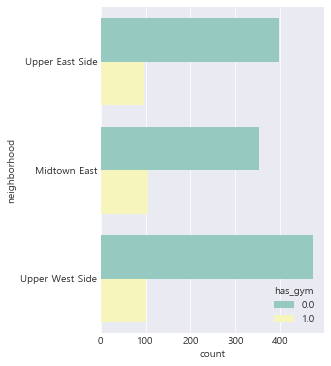

In [196]:
#categorical
df_top3=df_cut[df_cut['neighborhood'].isin(df_cut['neighborhood'].value_counts()[:3].index.tolist())]
plt.figure(figsize=(4,6))
cnt=sns.countplot(y='neighborhood',hue='has_gym',data=df_top3,palette='Set3')
cnt.set_xlabel('count')
cnt.set_ylabel('neighborhood')
plt.show()

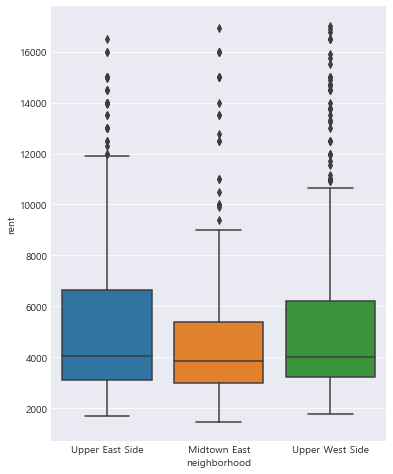

In [197]:
#cate-cont variables
plt.figure(figsize=(6,8))
box=sns.boxplot(x='neighborhood',y='rent',data=df_top3)
box.set_xlabel('neighborhood')
box.set_ylabel('rent')
plt.show()

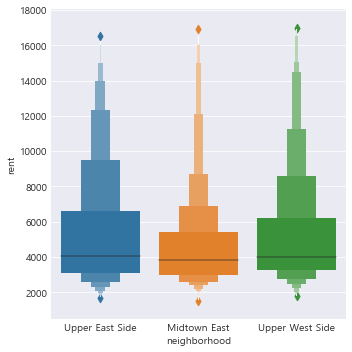

In [198]:
sns.catplot(x='neighborhood',y='rent',kind='boxen',data=df_top3)
plt.show()

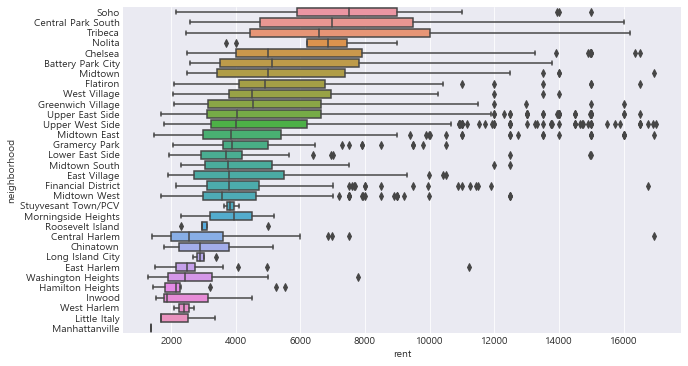

In [199]:
#Order by average rent
n=len(df_cut['neighborhood'].value_counts())
rent_order=df_cut.groupby(by=['neighborhood'])['rent'].mean().nlargest(n)[:n].index.tolist()
plt.figure(figsize=(10,6))
box=sns.boxplot(y='neighborhood',x='rent',data=df_cut,order=rent_order)
box.set_xlabel('rent')
box.set_ylabel('neighborhood')
plt.show()

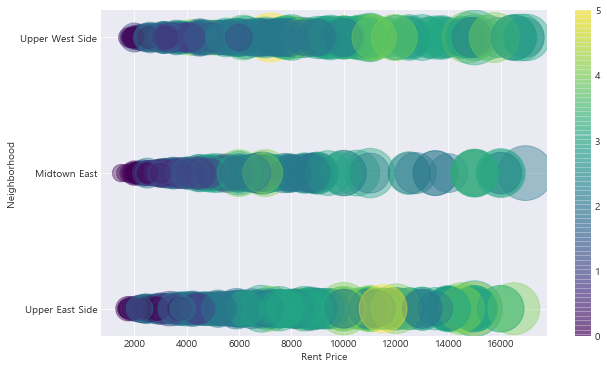

In [205]:
#Bubble chart with information of 4 variables
plt.figure(figsize=(10,6))
plt.scatter(df_top3['rent'],df_top3['neighborhood'], c=df_top3['bedrooms'],s=df_top3['size_sqft'],alpha=0.4,cmap='viridis')
plt.colorbar()
plt.ylabel('Neighborhood')
plt.xlabel('Rent Price')
plt.show()

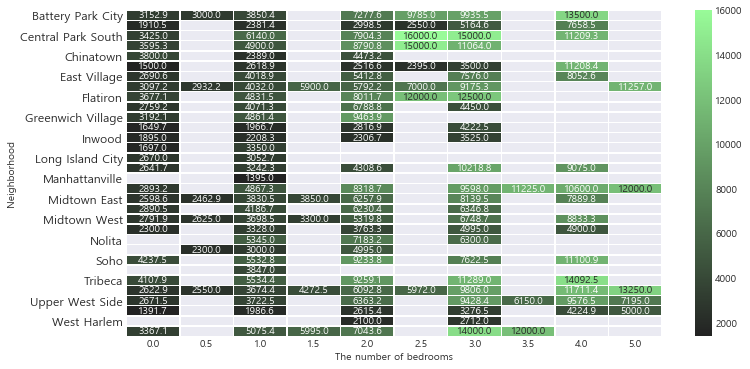

In [212]:
#Heat map
base=df_cut.groupby(['neighborhood','bedrooms'])['rent'].mean().unstack()
base
fig, ax = plt.subplots(figsize=(12,6))
#color palette
pal=sns.dark_palette('palegreen',as_cmap=True)
sns.heatmap(base,annot=True, ax=ax,linewidth=.5,fmt='.1f',cmap=pal)
plt.ylabel('Neighborhood')
plt.xlabel('The number of bedrooms')
#plt.xticks(rotation=90)
plt.yticks(fontsize=12)
plt.show()

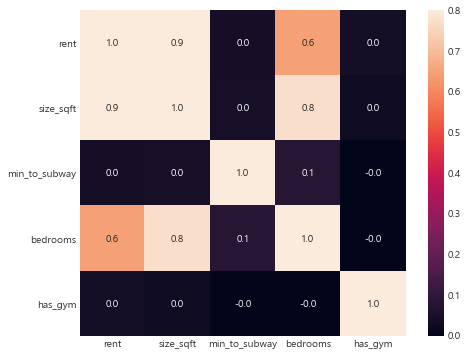

In [214]:
#Correlation
def draw_corrmat(df):
    y_corrmat=df.corr()
    f,ax=plt.subplots(figsize=(8,6))
    sns.heatmap(y_corrmat,vmax=.8,annot=True,fmt='.1f',square=True)
    
draw_corrmat(df_cut.iloc[:,:-1])    

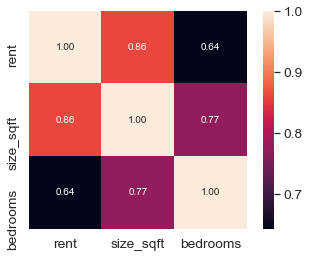

In [218]:
def draw_top_corrmat(df,y,k):
    #top k correlated variables
    y_corrmat=df.corr()
    y_cols=y_corrmat.nlargest(k,y)[y].index
    cm=np.corrcoef(df[y_cols].values.T)
    sns.set(font_scale=1.25)
    f,ax=plt.subplots(figsize=(6,4))
    hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=y_cols.values,xticklabels=y_cols.values)
    plt.show()
draw_top_corrmat(df_cut.iloc[:,:-1],'rent',3)

##### Feature selection

In [236]:
#Univariate selection - those with the strongest relationship with the target value 
#This looks at the score of individual features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
df_features=df_cut.iloc[:,:-1]
X,Y=df_cut.iloc[:,1:-1],df_cut.iloc[:,0]
#For regression: f_regression, mutual_info_regression
#For classification: chi2, f_classif, mutual_info_classif
test=SelectKBest(score_func=f_regression,k=2)
fit=test.fit(X,Y)
np.set_printoptions(precision=3)
print(fit.scores_)
print(fit.pvalues_)
features=fit.transform(X)
print(features[0:5,:]) #size sqft, bedrooms

[1.022e+04 6.363e+00 2.472e+03 5.115e+00]
[0.    0.012 0.    0.024]
[[4.80e+02 0.00e+00]
 [2.00e+03 2.00e+00]
 [9.16e+02 1.00e+00]
 [9.75e+02 1.00e+00]
 [1.10e+03 3.00e+00]]


In [238]:
#Recursive feature elimination 
#First model is made with initial set of features
#and each feature is scored -> one with the lowest score is pruned
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model=LinearRegression()
rfe=RFE(model,2)
fit=rfe.fit(X,Y)
print('num features: %d' % fit.n_features_)
print('Selected features: %s' %fit.support_)
print('Feature Ranking: %s' % fit.ranking_) #bedrooms, has_gym

num features: 2
Selected features: [False False  True  True]
Feature Ranking: [2 3 1 1]


In [242]:
#Calculating feature importance with tree models
from sklearn.ensemble import ExtraTreesRegressor #ExtraTreesClassifier
model=ExtraTreesRegressor(n_estimators=10)
model.fit(X,Y)
print(model.feature_importances_) #size_sqft, bedrooms

[0.755 0.068 0.168 0.008]


##### PC Algorithm for making network of variables

In [255]:
import subprocess
output = subprocess.call(r"C:\Program Files\R\R-4.1.1\bin\Rscript --vanilla testlib.R", shell=True)
print(output)

1


In [260]:
import networkx as nx
from cdt.causality.graph import PC
cdt.SETTINGS.rpath = r'C:\Program Files\R\R-4.1.1\bin\Rscript'
df_pc=df_cut.iloc[:,:-1]
obj=PC(CItest='rcit')
output=obj.predict(df_pc)

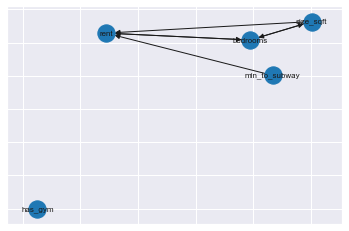

In [262]:
nx.draw_networkx(output,font_size=8)
plt.show()